In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import external
from skimage import io

import scipy
from scipy import ndimage as ndi
import skimage
from skimage import feature
from skimage.filters import sobel
from skimage.filters import gaussian

from simple_functions import floorValues
from simple_functions import matrixViz
from simple_functions import threeDViz

In [3]:
with skimage.external.tifffile.TiffFile('composite.tif') as tif:
    data = tif.asarray()
tif.close()

data = data[0]

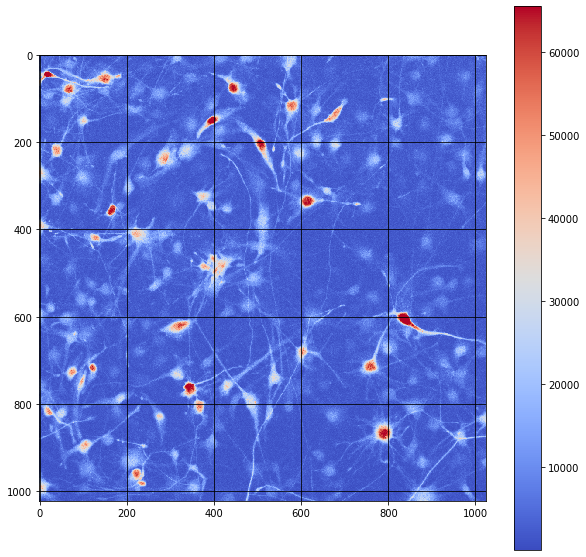

In [4]:
matrixViz(data)

In [5]:
#take comp gray scale and sample area with cell cluster/overlap
sample = data[:200,:200]

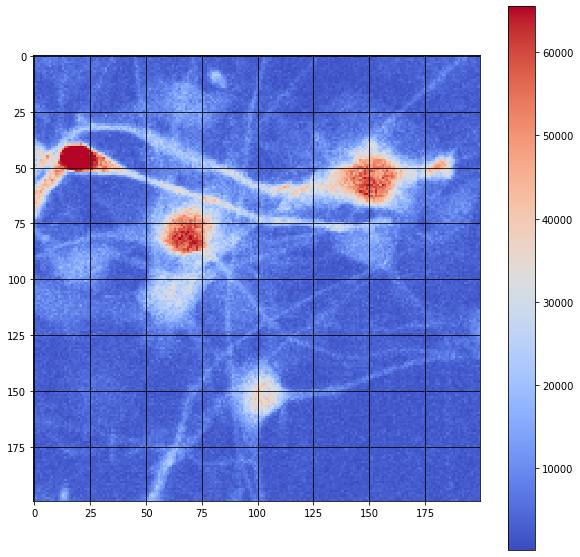

In [6]:
#intra cell is noisy, as is low vower value tails and background
#first need to define background and floor 
matrixViz(sample)

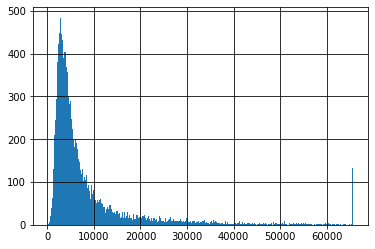

In [7]:
#hist shows significant amount of low level noise and signature of highest value suggests need to imporve scaling of measurment. 
#will make low value cell activty hard to distinguish from background

x = sample.ravel()
plt.grid(color='black')
ax = plt.hist(x,bins=1000)

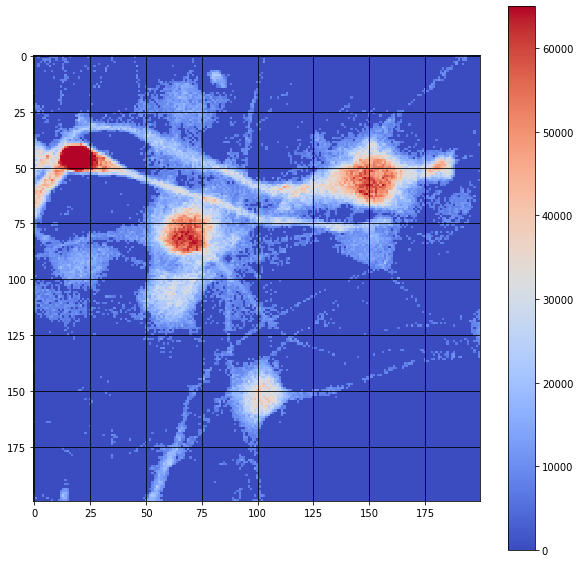

In [8]:
#floor values and intervals
#low threshold loses some pixels in cell activity but may be able to recover with morpohology/sobel/otsu
#strategy probably to do as much thresholding to define cell/background limits up to point of not being able to recover morphology

lower_floor = floorValues(sample,7500,1000)
matrixViz(lower_floor)

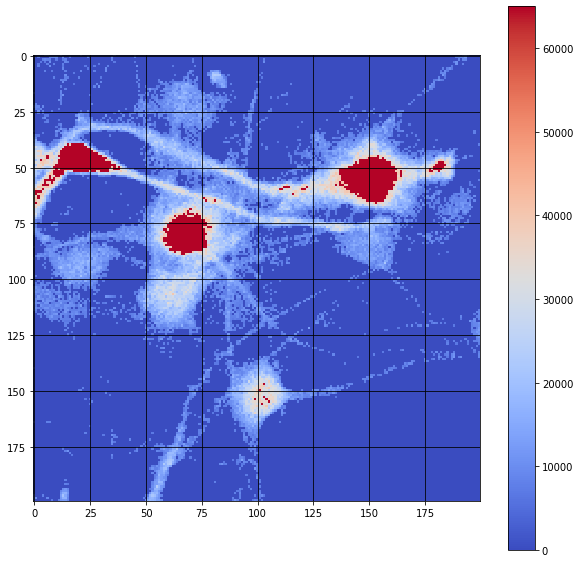

In [9]:
#set upper floor to define for definite cell detection
#could be used as marker

#good result for high value cells. pockets of high value of activity


upper_floor = lower_floor
upper_floor[upper_floor > 40000] = upper_floor.max()
matrixViz(upper_floor)

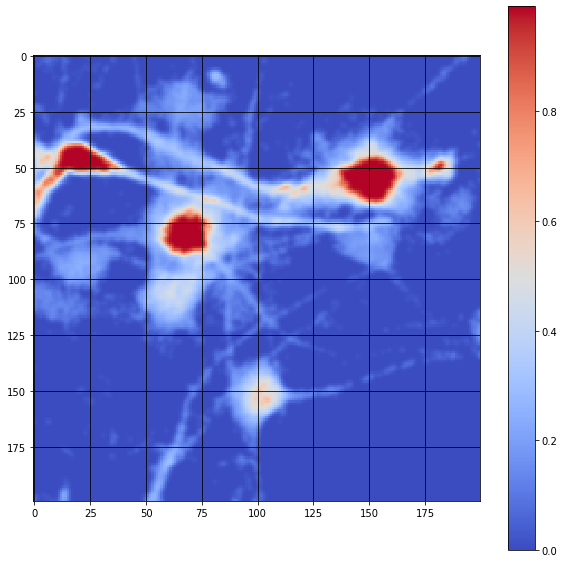

In [10]:
#apply a gaussian filter with high sigma value to get smooth contours. 
#shows clear peaks as cells. not clear how cell activity could be detected

gauss = skimage.filters.gaussian(upper_floor,sigma=10)
matrixViz(gaussian(upper_floor))

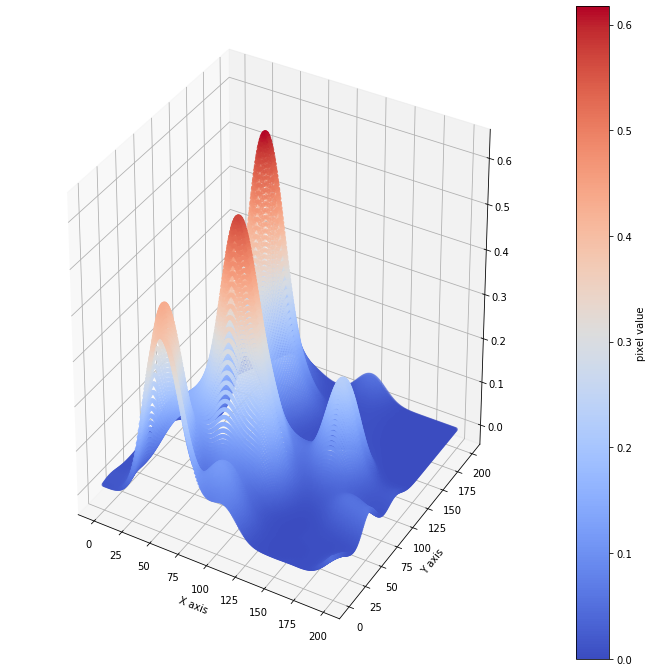

In [11]:
threeDViz(gauss)

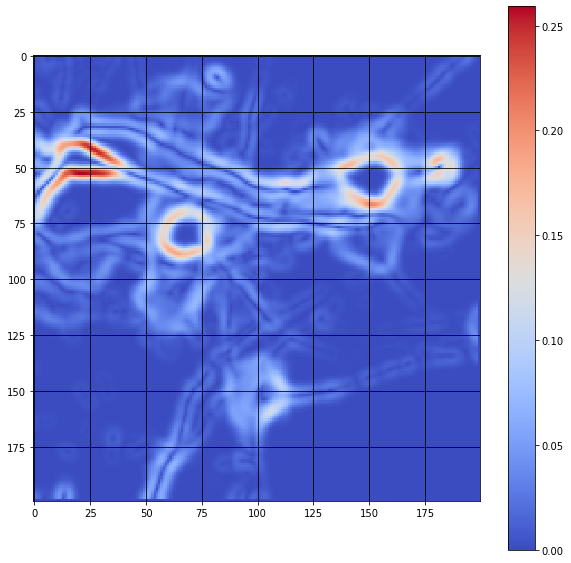

In [33]:
gauss = skimage.filters.gaussian(upper_floor,sigma=2)
matrixViz(sobel(gauss))

In [34]:
markers = np.ones(upper_floor.shape)
markers[upper_floor <22000] = 1
markers[upper_floor >= 22000] = 2

sob = sobel(gauss)
from skimage.morphology import watershed
segmentation = watershed(sob, markers)

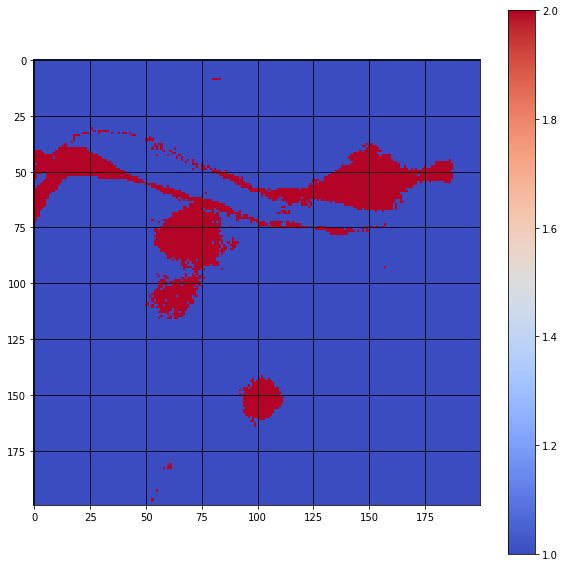

In [35]:
matrixViz(segmentation)

In [ ]:
#markers currently no good in noisy centre. would need larger area and smoother gradients and strong edges

markers = np.ones(floored.shape)
markers[40,20] = 2
markers[60,150] = 2
markers[80,65] = 2
markers[150,100] = 2

In [ ]:
sob = sobel(floored)
from skimage.morphology import watershed
segmentation = watershed(sob, markers)

In [27]:
sob[sob < 0.05] = 0